In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def _get_trainloss(fpath):
    
    with open(fpath, 'rb') as f:
        train_loss = pickle.load(f)
        test_data = pickle.load(f)
   
    
    return train_loss

def plot(*train_loss):
    fig = plt.figure(figsize = (8, 5))
    plt.title('train_loss graph')
    
    colormap = ['r','g', 'c', 'y', 'b']
    label = ['baseline', 'terngrad', 'bigcomp19', 'bigcomp20', 'vrprojection']
    max_epoch = 0
    
    
    for idx, loss in enumerate(train_loss):
        plt.plot(loss, colormap[idx],  label=label[idx])
        if len(loss) > max_epoch:
            max_epoch = len(loss)
        
            
    plt.xlabel('Epoch')
    plt.ylabel('train_loss')
    #plt.ylim(0, ylim)
    plt.xlim(0, max_epoch)
    plt.legend()
    plt.show()
    #plt.savefig('./Traing_loss_graph.png')

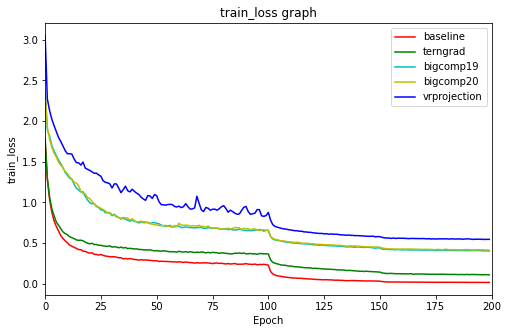

In [9]:
train_loss_sgd = _get_trainloss('./checkpoint/sgd_cifar10_resnet20.pickle')
train_loss_terngrad = _get_trainloss('./checkpoint/terngrad_cifar10_resnet20.pickle')
train_loss_bigcomp19 = _get_trainloss('./checkpoint/bigcomp19_cifar10_resnet20.pickle')
train_loss_bigcomp20 = _get_trainloss('./checkpoint/bigcomp20_cifar10_resnet20.pickle')
train_loss_vrprojection = _get_trainloss('./checkpoint/vrprojection_cifar10_resnet20.pickle')


plot(train_loss_sgd, train_loss_terngrad, train_loss_bigcomp19, train_loss_bigcomp20, train_loss_vrprojection)

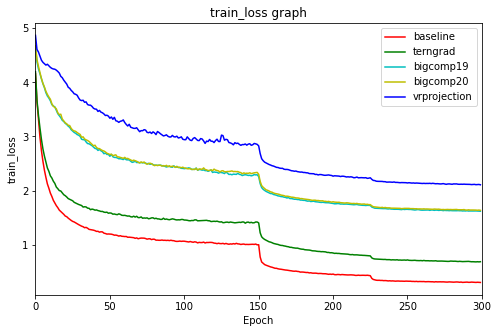

In [10]:
train_loss_sgd = _get_trainloss('./checkpoint/sgd_cifar100_resnet20.pickle')
train_loss_terngrad = _get_trainloss('./checkpoint/terngrad_cifar100_resnet20.pickle')
train_loss_bigcomp19 = _get_trainloss('./checkpoint/bigcomp19_cifar100_resnet20.pickle')
train_loss_bigcomp20 = _get_trainloss('./checkpoint/bigcomp20_cifar100_resnet20.pickle')
train_loss_vrprojection = _get_trainloss('./checkpoint/vrprojection_cifar100_resnet20.pickle')


plot(train_loss_sgd, train_loss_terngrad, train_loss_bigcomp19, train_loss_bigcomp20, train_loss_vrprojection)

# Top5 Accuracy

max Top5 accuarcy of resnet20 with baseline: 91.280000
max Top5 accuarcy of resnet20 with terngrad : 87.340000
max Top5 accuarcy of resnet20 with one_side : 80.540000
max Top5 accuarcy of resnet20 with svrg_new : 83.040000


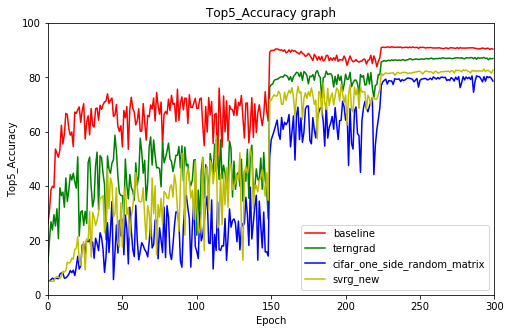

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def _get_top5(fpath):
    top5_acc_list = []
    with open(fpath, 'rb') as f:
        train_loss = pickle.load(f)
        test_data = pickle.load(f)

        
    
    # len(test_data) is same with epoch, and each element is (loss avg, top1 avg, top5 avg) of each epoch 
          
    for acc in test_data:
        top5_acc_list.append(acc[2])
    
    max_top5_acc= np.sort(top5_acc_list)[-1]
    
    return top5_acc_list, max_top5_acc

def plot(*test_acc):
    fig = plt.figure(figsize = (8, 5))
    plt.title('Top5_Accuracy graph')
    
    colormap = ['r','g', 'b','y']
    label = ['baseline', 'terngrad', 'cifar_one_side_random_matrix', 'svrg_new']
    max_epoch = 0
    
    for idx, acc in enumerate(test_acc):
        plt.plot(acc, colormap[idx],  label=label[idx])
        if len(acc) > max_epoch:
            max_epoch = len(acc)
            
    plt.xlabel('Epoch')
    plt.ylabel('Top5_Accuracy')
    plt.ylim(0,100)
    plt.xlim(0, max_epoch)
    plt.legend()
    #plt.savefig('./Top5_Accuracy_graph.png')
    
    

    
if __name__ == '__main__':
     
    
    top5_acc_baseline, max_top5_baseline = _get_top5('./Momentum100_ResNet20_baseline.pickle')
    top5_acc_terngrad, max_top5_terngrad = _get_top5('./Momentum100_ResNet20_terngrad.pickle')
    top5_acc_one_side, max_top5_one_side = _get_top5('./Momentum100_ResNet20_cifar_one_side_random_matrix.pickle')
    top5_acc_svrg_new, max_top5_svrg_new = _get_top5('./Momentum100_ResNet20_svrg_new.pickle')
      
    print('max Top5 accuarcy of resnet20 with baseline: %f' % max_top5_baseline)
    print('max Top5 accuarcy of resnet20 with terngrad : %f' % max_top5_terngrad)
    print('max Top5 accuarcy of resnet20 with one_side : %f' % max_top5_one_side)
    print('max Top5 accuarcy of resnet20 with svrg_new : %f' % max_top5_svrg_new)
 
    

    plot(top5_acc_baseline, top5_acc_terngrad, top5_acc_one_side, top5_acc_svrg_new)

# Top1 Accuracy

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def _get_top1(fpath):
    top1_acc_list = []
    with open(fpath, 'rb') as f:
        train_loss = pickle.load(f)
        test_data = pickle.load(f)
    
    # len(test_data) is same with epoch, and each element is (loss avg, top1 avg, top5 avg) of each epoch 
          
    for acc in test_data:
        top1_acc_list.append(acc[1])
    
    max_top1_acc= np.sort(top1_acc_list)[-1]
    
    return top1_acc_list, max_top1_acc

def plot(*test_acc):
    fig = plt.figure(figsize = (8, 5))
    plt.title('Top1_Accuracy graph')
    
    colormap = ['r','g', 'c', 'y', 'b']
    label = ['baseline', 'terngrad', 'bigcomp19', 'bigcomp20', 'vrprojection']
    max_epoch = 0
    
    for idx, acc in enumerate(test_acc):
        plt.plot(acc, colormap[idx],  label=label[idx])
        if len(acc) > max_epoch:
            max_epoch = len(acc)
            
    plt.xlabel('Epoch')
    plt.ylabel('Top1_Accuracy')
    #plt.ylim(0,100)
    plt.xlim(0, max_epoch)
    plt.legend()
    #plt.savefig('./Top1_Accuracy_graph.png')   


max Top1 accuarcy of resnet20 with sgd: 91.910000
max Top1 accuarcy of resnet20 with terngrad : 90.640000
max Top1 accuarcy of resnet20 with bigcomp19 : 83.370000
max Top1 accuarcy of resnet20 with bigcomp20 : 83.330000
max Top1 accuarcy of resnet20 with vrprojection : 79.730000


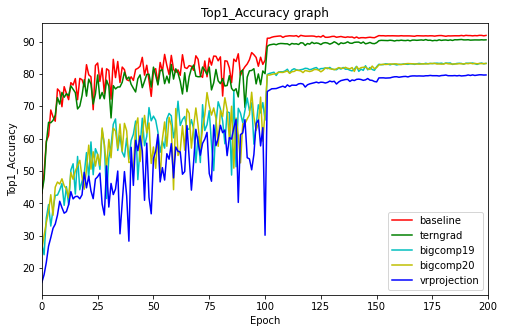

In [15]:
top1_acc_sgd, max_top1_sgd = _get_top1('./checkpoint/sgd_cifar10_resnet20.pickle')
top1_acc_terngrad, max_top1_terngrad = _get_top1('./checkpoint/terngrad_cifar10_resnet20.pickle')
top1_acc_bigcomp19, max_top1_bigcomp19 = _get_top1('./checkpoint/bigcomp19_cifar10_resnet20.pickle')
top1_acc_bigcomp20, max_top1_bigcomp20 = _get_top1('./checkpoint/bigcomp20_cifar10_resnet20.pickle')
top1_acc_vrprojection, max_top1_vrprojection = _get_top1('./checkpoint/vrprojection_cifar10_resnet20.pickle')

print('max Top1 accuarcy of resnet20 with sgd: %f' % max_top1_sgd)
print('max Top1 accuarcy of resnet20 with terngrad : %f' % max_top1_terngrad)
print('max Top1 accuarcy of resnet20 with bigcomp19 : %f' % max_top1_bigcomp19)
print('max Top1 accuarcy of resnet20 with bigcomp20 : %f' % max_top1_bigcomp20)
print('max Top1 accuarcy of resnet20 with vrprojection : %f' % max_top1_vrprojection)


plot(top1_acc_sgd, top1_acc_terngrad, top1_acc_bigcomp19, top1_acc_bigcomp20, top1_acc_vrprojection)

max Top1 accuarcy of resnet20 with sgd: 68.780000
max Top1 accuarcy of resnet20 with terngrad : 65.150000
max Top1 accuarcy of resnet20 with bigcomp19 : 51.790000
max Top1 accuarcy of resnet20 with bigcomp20 : 50.740000
max Top1 accuarcy of resnet20 with vrprojection : 42.500000


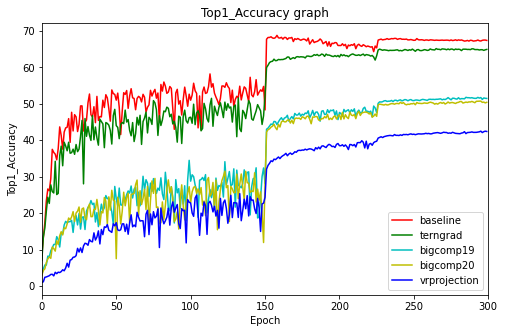

In [16]:
top1_acc_sgd, max_top1_sgd = _get_top1('./checkpoint/sgd_cifar100_resnet20.pickle')
top1_acc_terngrad, max_top1_terngrad = _get_top1('./checkpoint/terngrad_cifar100_resnet20.pickle')
top1_acc_bigcomp19, max_top1_bigcomp19 = _get_top1('./checkpoint/bigcomp19_cifar100_resnet20.pickle')
top1_acc_bigcomp20, max_top1_bigcomp20 = _get_top1('./checkpoint/bigcomp20_cifar100_resnet20.pickle')
top1_acc_vrprojection, max_top1_vrprojection = _get_top1('./checkpoint/vrprojection_cifar100_resnet20.pickle')

print('max Top1 accuarcy of resnet20 with sgd: %f' % max_top1_sgd)
print('max Top1 accuarcy of resnet20 with terngrad : %f' % max_top1_terngrad)
print('max Top1 accuarcy of resnet20 with bigcomp19 : %f' % max_top1_bigcomp19)
print('max Top1 accuarcy of resnet20 with bigcomp20 : %f' % max_top1_bigcomp20)
print('max Top1 accuarcy of resnet20 with vrprojection : %f' % max_top1_vrprojection)


plot(top1_acc_sgd, top1_acc_terngrad, top1_acc_bigcomp19, top1_acc_bigcomp20, top1_acc_vrprojection)